# Spiral arm instability

In [1]:
import os
from IPython.display import Image
import numpy as np
from PIL import Image as Im
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy.io import fits

%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
Distance = 9.3 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)
scale = (Distance*1000*2*np.pi)/(360*60*60.) # kpc/acrsec

In [2]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_s_old = np.load('./data/Sigma_s_old.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
r_HI_old = np.load('./data/r_HI_old.npy')
vel_HI_old = np.load('./data/vel_HI_old.npy')
velocity_HI = np.load('./data/velocity_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc_corr.npy')
sig_R_min_err = np.load('./data/sig_R_min_err.npy')
sig_R_max_err = np.load('./data/sig_R_max_err.npy')
sigma_s_err = np.load('./data/sigma_s_err.npy')
phi = np.load('./data/phi.npy')

## A single-component model


$$ S = \dfrac{\sigma^2 \kappa^2 + 4 \Omega^2}{\pi G f(\kappa W) Y \kappa^2}$$



$f(\kappa W) = K_0(\kappa W) L_{-1}(\kappa W) + K_1(\kappa W) L_0(\kappa W)$

where $K_i$ and $L_i$ are modified Bessel and Struve functions of order i

$$Y = 1.4 W \Sigma_0$$
$$\sigma = \sigma_{\phi} + c$$
$\sigma_{\phi}$ and $c$ are azimuthal dispersion of turbulent velocities and sound velocity of gas.

### The instability condition issatisfied when min(S(k))<1

## A two-component model


$$ S = \dfrac{1}{\pi G \kappa^2} \left(\dfrac{f(\kappa W_g) Y_g}{\sigma_g^2 \kappa^2 + 4 \Omega_g^2} + \dfrac{f(\kappa W_s) Y_s }{\sigma_s^2 \kappa^2 + 4 \Omega_s^2} \right) ^ {-1}$$



$f(\kappa W) = K_0(\kappa W) L_{-1}(\kappa W) + K_1(\kappa W) L_0(\kappa W)$

where $K_i$ and $L_i$ are modified Bessel and Struve functions of order i

$$Y_{g,s} = 1.4 W_{g,s} \Sigma^0_{g,s}$$
$$\sigma_g = \sigma_{\phi}^g + c$$
$\sigma_{\phi}^g$ and $c$ are azimuthal dispersion of turbulent velocities and sound velocity of gas.

### The instability condition issatisfied when min(S(k))<1

Для начала обрежем карту с маской до нужных нам размеров.

In [ ]:
# обрезаем данные
# по сути все как в get_data только без функций
image_file = get_pkg_data_filename('spirals/HI/arms_mask.fits')
image_file = fits.getdata(image_file)
image_data = np.squeeze(image_file)

data = fits.getdata('./data/NGC_3627_NA_MOM0_THINGS.FITS')
data = np.squeeze(data)
data_WCS = WCS(second_fits, naxis = 2)
cposition = SkyCoord('{} {}'.format(data_WCS.wcs.crval[0], gas_WCS.wcs.crval[1]), frame='fk5', unit='deg', equinox='J2000.0')

size = [380,140] 
size_ = u.Quantity(size, u.arcsec)

data = Cutout2D(data, cposition, size, wcs=data_WCS, mode='partial', fill_value=0.)    
image_data = Cutout2D(image_data, cposition, size_, wcs=data_WCS, mode='partial', fill_value=0.)


# теперь делаем их нужной размерности
shape = [190,70]
first_data = fits.getdata('./data/NGC3627_map_ha_corr.fits')
first_data = np.squeeze(first_data)
first_WCS = WCS('./data/NGC3627_map_ha_corr.fits', naxis = 2)
first_data = Cutout2D(first_data, cposition, size_, wcs=first_WCS, mode='partial', fill_value=0.)

X, Y = np.meshgrid(np.arange(0, shape[1], 1), np.arange(0, shape[0], 1))
sgrid = pixel_to_skycoord(X.ravel(), Y.ravel(), first_data.wcs).reshape((shape[0], shape[1]))
    
grid_pixs = []
new_data = []
for scoord in sgrid.ravel():
    spix = skycoord_to_pixel(scoord, data.wcs)
    grid_pixs.append(spix)
    new_data.append(image_data.data[int(spix[1])][int(spix[0])])
    
new_data = np.array(new_data).reshape(190,70)   

mask_gas = new_data[0:-34,0:-4]

Теперь вызволим из таблиц необходимые мне данные

In [ ]:
# угол закрутки
def get_pitch_data(color=None):
    pitch = []
        
    with open('spirals/Sigma_S/PGC0000_arm_tangents.reg', 'r') as file:
        for l in file.readlines():
            color_ = l[l.index('color=')+6:l.index('pitch=')].replace('  ', '')
            
            if color_ == color:
                pitch.append(l[l.index('pitch=')+6:])
                
    return pitch            
                
# плотность потока в пике
def get_peak_density_data(filename=None):
    peak_flux = []
    
    with open(filename, 'r') as file
        lines = file.readlines()
        for l in lines[1:]:
            peak_flux.append(l[8])
            
    peak_density = (6.07 * 2 * 1000 * cosi * peak_flux) / (10.6 * 8.85 * scale**2 * 1000**2)  
    
    return peak_density

# полуширина в гауссиане
def get_half_width_data(filename=None):
    width_left = []
    width_right = []
    coeff =     #!!!! нужно ещё раз пересчитать масштабный коэффициент
    with open(filename, 'r') as file
        lines = file.readlines()
        for l in lines[1:]:
            width_left.append(l[5])
            width_right.append(l[7])
            
    width = coeff * (width_right + width_left) / 2
    
    return width


Перейдем к самому критерию

### Поиccледум функцию $S(\kappa)$

In [3]:
 from scipy.special import j0,j1,struve
    

In [4]:
f = lambda y: j0(y) * struve(-1,y) + j1(y) * struve(0,y)
S = lambda x: (sigma**2 * x**2 + 4 * Omega**2) / (np.pi * G * f(x*W) * Y * x**2)

In [106]:
W = 0.5
sigma = 5
Omega = 50
G = 4.32
Y = 1.4 * W * 8


In [107]:
k = np.linspace(1,100,1000)
Crit = S(k)

(0, 40)

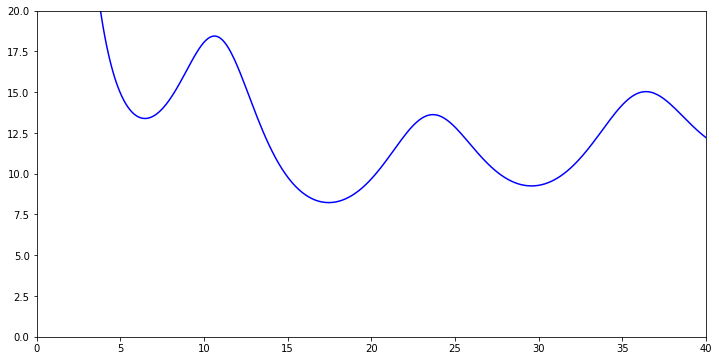

In [108]:
plt.figure(figsize=[12, 6])
plt.plot(k,Crit,'blue')
plt.ylim(0,20)
plt.xlim(0,40)

In [117]:
S1 = lambda x: 1/np.pi*G*x**2 * (  (Y_g * f(x*W_g))/(sigma_g**2*x**2 + 4*Omega**2) + (Y_s * f(x*W_s))/(sigma_s**2*x**2 + 4*Omega**2) )

In [124]:
W_g = 0.5
W_s = 0.2
sigma_g = 5
sigma_s = 50
Omega = 70
G = 4.32
Y_g = 1.4 * W_g * 8
Y_s = 1.4 * W_s * 3000

In [125]:
k = np.linspace(1,100,1000)
Crit = S1(k)

(0, 40)

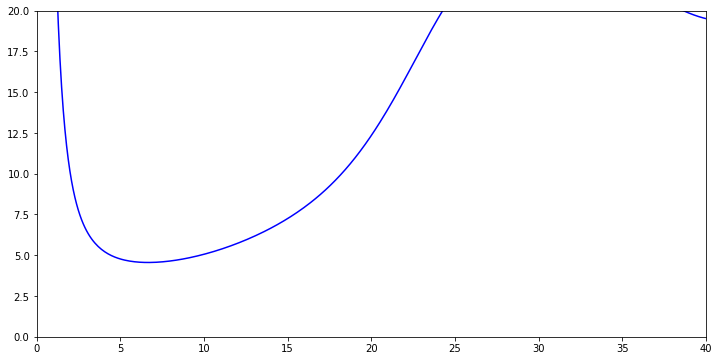

In [126]:
plt.figure(figsize=[12, 6])
plt.plot(k,1/Crit,'blue')
plt.ylim(0,20)
plt.xlim(0,40)

In [ ]:
pitch = get_pitch_data(color=green)
width = get_half_width_data(filename='spirals/HI/arm_params_green.dat')
peak_density = get_peak_density_data(filename='spirals/HI/arm_params_green.dat')

In [ ]:
k = np.linspace(1,50,100)
inst_param = np.zeros(dist_kpc.shape)
phi_border = 
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        
        for k in range(31):
            if (mask_gas[i][j]==1.) & (phi_borger[k]<=phi[i][j]<phi_border[k+1]) & (j>30):
                sigma = sigma_HI[i][j]/1000.
                Omega = 50
                W = width[k]#/np.cos(pitch[k])
                Y = 1.44 * width[k] * peak_density[k]
                S = (sigma**2 * k**2 + 4 * Omega**2) / (np.pi * G * f(k*W) * Y * k**2)
                inst_param[i][j] = np.min(S) 

Теперь попробуем понять какие позиционные углы конца и начала спиралей

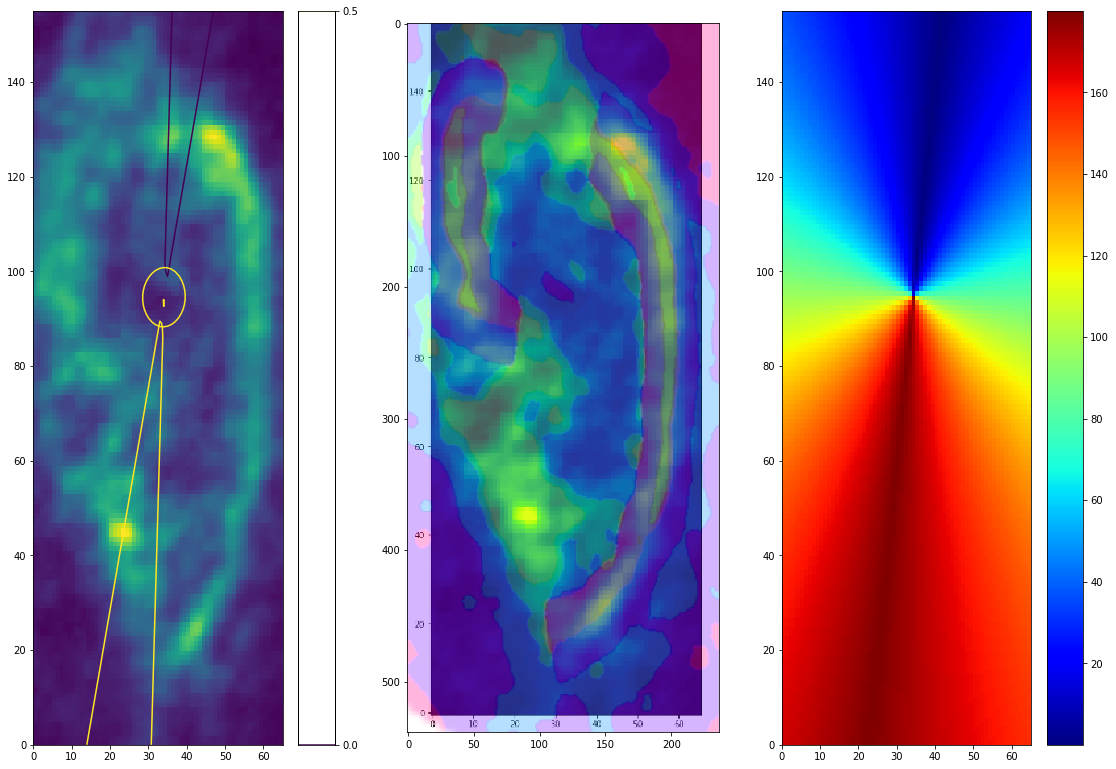

In [14]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[19, 13.5])
plt.subplot(1,3,1)
quadmesh = plt.pcolormesh(X, Y, Sigma_HI)
CS = plt.contour(X, Y, phi, levels=[5., 175.], aspect='auto')
CS = plt.contour(X, Y, dist_kpc, levels=[0, 0.5], aspect='auto')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(Im.open('./images/Sigma_HI.png'))
plt.subplot(1,3,3)
quadmesh = plt.pcolormesh(X, Y, phi, cmap='jet')
plt.colorbar()
plt.show()

У нас есть 30 срезов, значит, на каждый из них приходится по 5.6 градусов.
Также нужно перевести из данного масштаба (на 1 пиксель 0.4 пк). После уменьшения разрешения получаем масштаб 0.5 pc/pix. На нашей карте в 1 пикселе 85.9 пк. Следовательно для перевода нужно умножать на 172. 